##### Copyright 2020 The Cirq Developers

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Notebook template

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/tutorials/google/colab"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/main/docs/tutorials/google/colab.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/main/docs/tutorials/google/colab.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/tutorials/google/colab.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

## Setup


In [ ]:
try:
    import cirq
    import cirq_google
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq-google
    print("installed cirq.")
    import cirq
    import cirq_google

## Make a copy of this template

You will need to have access to Quantum Computing Service before running this colab.

This notebook can serve as a starter kit for you to run programs on Google's quantum hardware.  You can download it using the directions below, open it in colab (or Jupyter), and modify it to begin your experiments.

## How to download iPython notebooks from GitHub

You can retrieve iPython notebooks in the Cirq repository by
going to the [docs/ directory](https://github.com/quantumlib/Cirq/tree/main/docs).  For instance, this Colab template is found [here](https://github.com/quantumlib/Cirq/blob/main/docs/tutorials/google/colab.ipynb). Select the file that you would like to download and then click the *Raw* button in the upper-right part of the window:

<img src="https://raw.githubusercontent.com/quantumlib/Cirq/main/docs/images/colab_github.png" alt="GitHub UI button to view raw file">

This will show the entire file contents.  Right-click and select *Save as* to save this file to your computer.  Make sure to save to a file with a `.ipynb` extension (you may need to select *All files* from the format dropdown instead of *text*). You can also get to this Colab's [raw content directly](https://raw.githubusercontent.com/quantumlib/Cirq/main/docs/tutorials/google/colab.ipynb)

You can also retrieve the entire Cirq repository by running the following command in a terminal that has `git` installed:

```
git checkout https://github.com/quantumlib/Cirq.git
```

## How to open Google Colab

You can open a new Colab notebook from your Google Drive window or by visiting the [Colab site](https://colab.research.google.com/notebooks/intro.ipynb).  From the Colaboratory site, you can use the menu to upload an iPython notebook:

<img src="https://raw.githubusercontent.com/quantumlib/Cirq/main/docs/images/colab_upload.png" alt="Google Colab's upload notebook entry in File menu.">

This will upload the ipynb file that you downloaded before.  You can now run all the commands, modify it to suit your goals, and share it with others.

### More Documentation Links

* [Quantum Engine concepts](../../google/concepts.ipynb)
* [Quantum Engine documentation](../../google/engine.md)
* [Cirq documentation](https://quantumai.google/cirq)
* [Colab documentation](https://colab.research.google.com/notebooks/welcome.ipynb)


## Authenticate with Quantum Computing Service and install Cirq

For details of authentication and installation, please see [Get started with Quantum Computing Service](start.ipynb).

Note:  The below code will install the latest stable release of Cirq.  If you need the latest and greatest features and don't mind if a few things aren't quite working correctly, you can install the pre-release version of `cirq` using `pip install --upgrade cirq~=1.0.dev` instead of `pip install cirq` to get the most up-to-date features of Cirq.

1. Enter the Cloud project ID you'd like to use in the `project_id` field.
2. Then run the cell below (and go through the auth flow for access to the project id you entered).

<img src="https://raw.githubusercontent.com/quantumlib/Cirq/main/docs/images/run-code-block.png" alt="Quantum Engine console">

In [ ]:
# The Google Cloud Project id to use.
project_id = '' #@param {type:"string"}
processor_id = "" #@param {type:"string"}

from cirq_google.engine.qcs_notebook import get_qcs_objects_for_notebook
# For real engine instances, delete 'virtual=True' below.
qcs_objects = get_qcs_objects_for_notebook(project_id, processor_id, virtual=True)
engine = qcs_objects.engine
processor_id = qcs_objects.processor_id

## Create an Engine variable

The following creates an engine variable which can be used to run programs under the project ID you entered above.

In [13]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

uploaded = files.upload()

churn = pd.read_csv('churn_info.csv', sep=';', dtype={'customer_id': str, 'churn': str})
churn.columns = churn.columns.str.strip()

churn['churn'] = churn['churn'].str.strip().replace({'': '0', None: '0'}).astype(int)

customers = pd.read_csv('customer_info.csv', sep=';')
history   = pd.read_csv('history_info.csv', sep=';')
customers.columns = customers.columns.str.strip()
history.columns   = history.columns.str.strip()

def ensure_customer_id(df):
    if 'customer_id' not in df.columns:
        if 'customerId' in df.columns:
            df.rename(columns={'customerId': 'customer_id'}, inplace=True)
        elif 'id' in df.columns:
            df.rename(columns={'id': 'customer_id'}, inplace=True)

for df in (churn, customers, history):
    ensure_customer_id(df)

churn['customer_id']     = churn['customer_id'].astype(int)
customers['customer_id'] = customers['customer_id'].astype(int)
history['customer_id']   = history['customer_id'].astype(int)

history_agg = (
    history
    .groupby('customer_id')[['call_in', 'call_out', 'internet_usage']]
    .sum()
    .reset_index()
)

data = (
    customers
    .merge(history_agg, on='customer_id', how='left')
    .merge(churn,       on='customer_id', how='left')
)

data = data.dropna(subset=['churn'])
data['churn'] = data['churn'].astype(int)

data[['call_in', 'call_out', 'internet_usage']] = (
    data[['call_in', 'call_out', 'internet_usage']].fillna(0)
)
y = data['churn']
X = data.drop(['customer_id', 'churn'], axis=1)

numeric_cols     = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer,     numeric_cols),
    ('cat', categorical_transformer, categorical_cols),
])

clf_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('clf',     RandomForestClassifier(
                    n_estimators=100,
                    random_state=42,
                    class_weight='balanced'
               ))
])
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

clf_pipeline.fit(X_train, y_train)

y_pred = clf_pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=[0, 1]))


Saving churn_info.csv to churn_info (11).csv
Saving customer_info.csv to customer_info (11).csv
Saving history_info.csv to history_info (11).csv

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.39      0.41       150
           1       0.46      0.52      0.49       150

    accuracy                           0.45       300
   macro avg       0.45      0.45      0.45       300
weighted avg       0.45      0.45      0.45       300


Confusion Matrix:
[[58 92]
 [72 78]]


# Новый раздел

Saving data_traffic.csv to data_traffic.csv


,region,month,total_usage,average_usage,median_usage,records_count
0,Batken,2022-01-01,418.0,22.000000,20.0,19
1,Batken,2022-02-01,356.0,25.428571,22.0,14
2,Batken,2022-03-01,442.0,23.263158,22.0,19
3,Batken,2022-04-01,542.0,20.074074,18.0,27
4,Batken,2022-05-01,344.0,22.933333,25.0,15
...,...,...,...,...,...,...
91,unknown,2022-08-01,857.0,24.485714,24.0,35
92,unknown,2022-09-01,967.0,26.135135,28.0,37
93,unknown,2022-10-01,633.0,23.444444,22.0,27
94,unknown,2022-11-01,731.0,26.107143,24.0,28


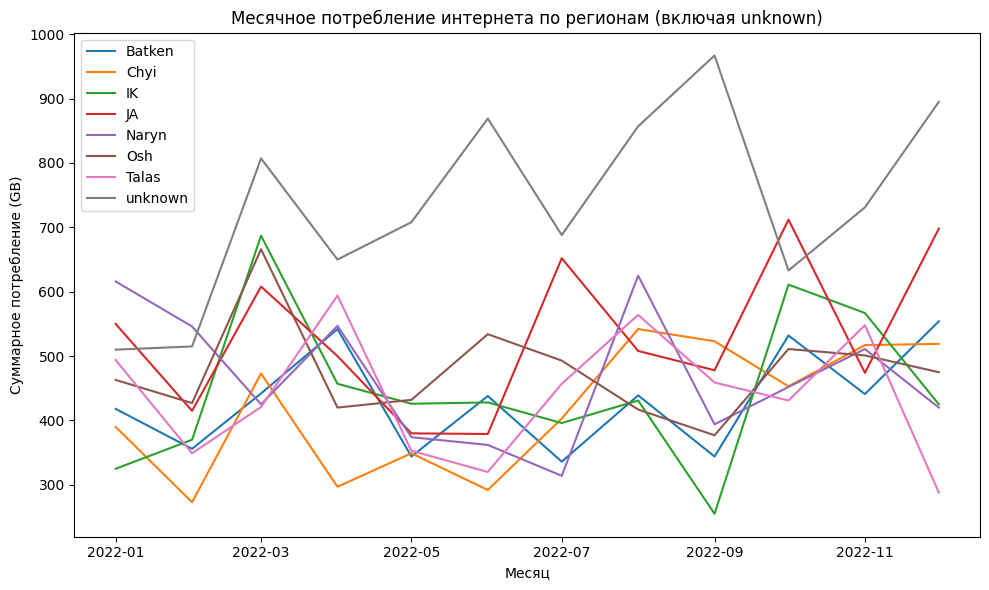

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display

uploaded = files.upload()

data = pd.read_csv('data_traffic.csv')

for col in ['region', 'customer_id']:
    data[col] = data[col].fillna('unknown').astype(str)

data.drop_duplicates(inplace=True)
data.dropna(subset=['internet_used_gb', 'date_time'], inplace=True)
data['internet_used_gb'] = pd.to_numeric(data['internet_used_gb'], errors='coerce')
data.dropna(subset=['internet_used_gb'], inplace=True)
data = data[data['internet_used_gb'] >= 0]
data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce')
data.dropna(subset=['date_time'], inplace=True)

data['month'] = data['date_time'].dt.to_period('M')
monthly_stats = (
    data
    .groupby(['region', 'month'])['internet_used_gb']
    .agg(
        total_usage='sum',
        average_usage='mean',
        median_usage='median',
        records_count='count'
    )
    .reset_index()
)
monthly_stats['month'] = monthly_stats['month'].dt.to_timestamp()

display(monthly_stats)

plt.figure(figsize=(10, 6))
for region, grp in monthly_stats.groupby('region'):
    plt.plot(grp['month'], grp['total_usage'], label=region)
plt.xlabel('Месяц')
plt.ylabel('Суммарное потребление (GB)')
plt.title('Месячное потребление интернета по регионам (включая unknown)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
WITH ranked AS (
  SELECT
    id,
    customer_id,
    balance,
    tariff_id,
    ROW_NUMBER() OVER (
      PARTITION BY customer_id
      ORDER BY date DESC, id DESC
    ) AS rn
  FROM sim_card_issues
)
SELECT
  id,
  balance,
  tariff_id
FROM ranked
WHERE rn = 2
ORDER BY customer_id;
